In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
from semantic_segmentation_tile import *

In [12]:
img_path = Path("dataset_segmentation/images/Apricot1.png")

In [9]:
imgorg_p = Path("Dataset/Apple/Apple1.tif")

In [10]:
open_image(imgorg_p).shape

torch.Size([3, 3498, 2466])

In [13]:
#get an image
img = open_image(img_path)

In [14]:
img.shape

torch.Size([3, 3498, 2466])

In [16]:
img_tile = open_image_tile((img_path,(5,3), (200, 300), 1, None, None ))

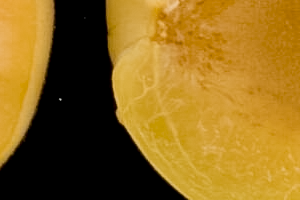

In [17]:
img_tile

In [2]:
# call the segmentation model to predict mask

In [21]:
segm_pred = SegmentationTilePrecict(img_path, learn_segm, max_tile_size=256, max_tol=30, scale=2)

Image Prediction original size: (1749, 1233);
number of rows: 7, columns: 5;
size of tiles: (249, 246);
discared pixels due to rounding y: 6 x: 3


In [37]:
segm_pred.learn = segm_pred.learn.load("/home/user/fruit-detection/models/resnet_18_4_epoch_1e-4_scale2_50%validation_3_rand_bgs")

In [32]:
Path('models/resnet_18_4_epoch_1e-4_scale2_50%validation_3_rand_bgs.pth').exists()

True

In [38]:
segm_pred.predict_mask()

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 1. Got 250 and 249 in dimension 2 at /opt/conda/conda-bld/pytorch_1565272271120/work/aten/src/TH/generic/THTensor.cpp:689

In [18]:
segm_pred.y_tile

249

In [9]:
#load trained model
learn_class = load_learner("dataset_classification", "Classification_resnet18_13_apr_2020")

In [3]:
# split in individual images

In [4]:
# get classification results